# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
df=pd.read_csv('/content/porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [ ]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df.created_at = pd.to_datetime(df.created_at)
df.actual_delivery_time = pd.to_datetime(df.actual_delivery_time)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df['market_id'] = df['market_id'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes
df['time_taken'] = df['actual_delivery_time']-df['created_at']
df['time_taken'] = df['time_taken'].dt.total_seconds() / 60


In [ ]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_order'] = df['created_at'].dt.hour

# Create a categorical feature 'isWeekend'
# df['day_name'] = df['created_at'].dt.day_name()
df['isWeekend'] = df['created_at'].dt.day_name().isin(['Saturday','Sunday']).astype(int).astype('category')
df.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour_of_order isWeekend  
0                      21.0     34.44        47.0             22         0  
1                       2.0     27.60        44.0             21         0  
2                      18.0     11.56        55.0              0         0  
3                       8.0     31.80        59.0              3         0  
4                       7.0      8.20        46.0              2         0

In [ ]:
# Drop unnecessary columns
df1 = df.drop(columns=['created_at', 'actual_delivery_time','min_item_price', 'max_item_price'])

In [ ]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour_of_order isWeekend  
0                      21.0     34.44        47.0             22         0  
1                       2.0     27.60        44.0             21         0  
2                      18.0     11.56        55.0              0         0  
3                       8.0     31.80        59.0              3         0  
4                       7.0      8.20        46.0              2         0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)

y = df1.pop('time_taken')
X = df1



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140621, 12)
(35156, 12)
(140621,)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat_var = ['market_id','store_primary_category','order_protocol','hour_of_order','isWeekend']
num_var = ['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

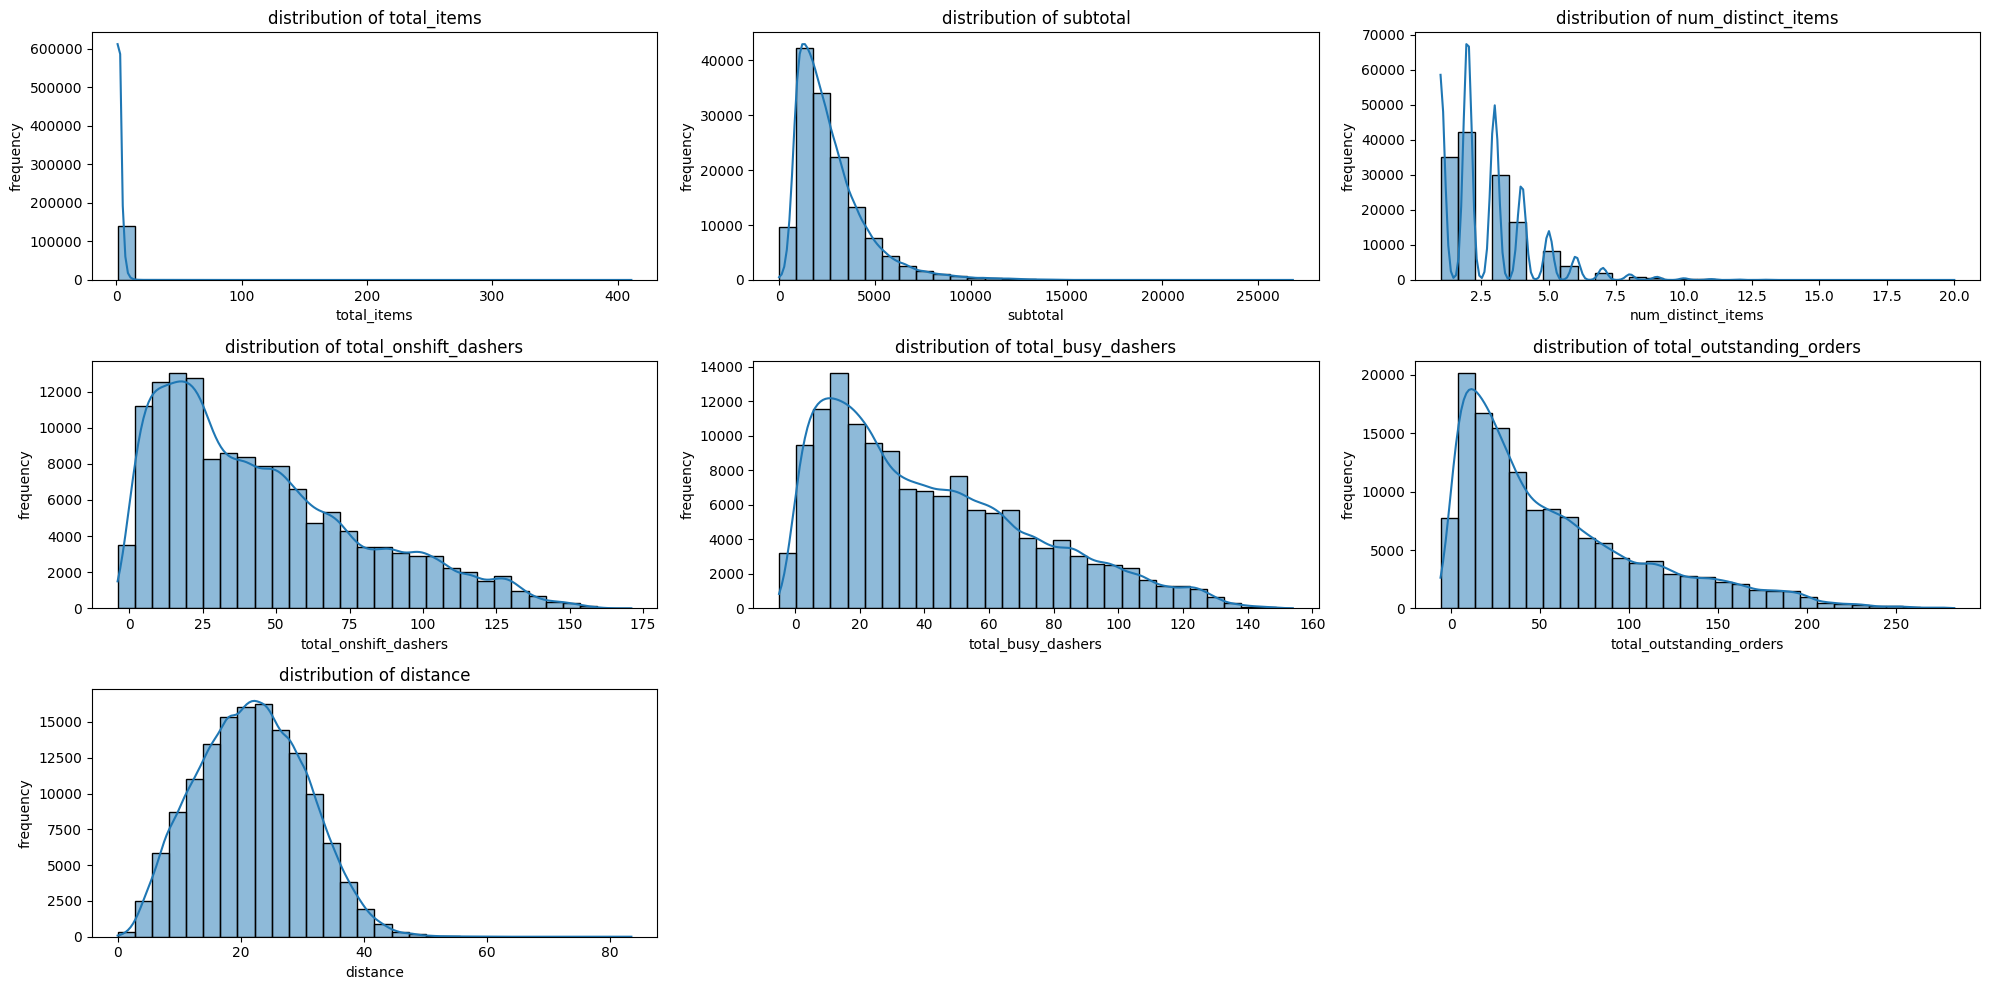

In [ ]:
# Plot distributions for all numerical columns
plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    sns.histplot(X_train[col], kde = True, bins = 30)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns
plt.figure(figsize = (30,20))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_train, x=col, palette='Blues')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-1104727454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette='Blues')
/tmp/ipython-input-21-1104727454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette='Blues')
/tmp/ipython-input-21-1104727454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette='Blues')
/tmp/ipython-input-21-1104727454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken

sns.histplot(y_train, kde = True, bins = 30)
plt.title('Distribution of Time taken')
plt.xlabel('Time taken')
plt.ylabel('frequency')
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    # sns.scatterplot(x = X_train[col],y = y_train)
    sns.regplot(x = X_train[col], y = y_train, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()



/tmp/ipython-input-26-2712245488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train[col], y=y_train, showfliers=False, palette='Blues')
/tmp/ipython-input-26-2712245488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train[col], y=y_train, showfliers=False, palette='Blues')
/tmp/ipython-input-26-2712245488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train[col], y=y_train, showfliers=False, palette='Blues')
/tmp/ipython-input-26-2712245488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is depre

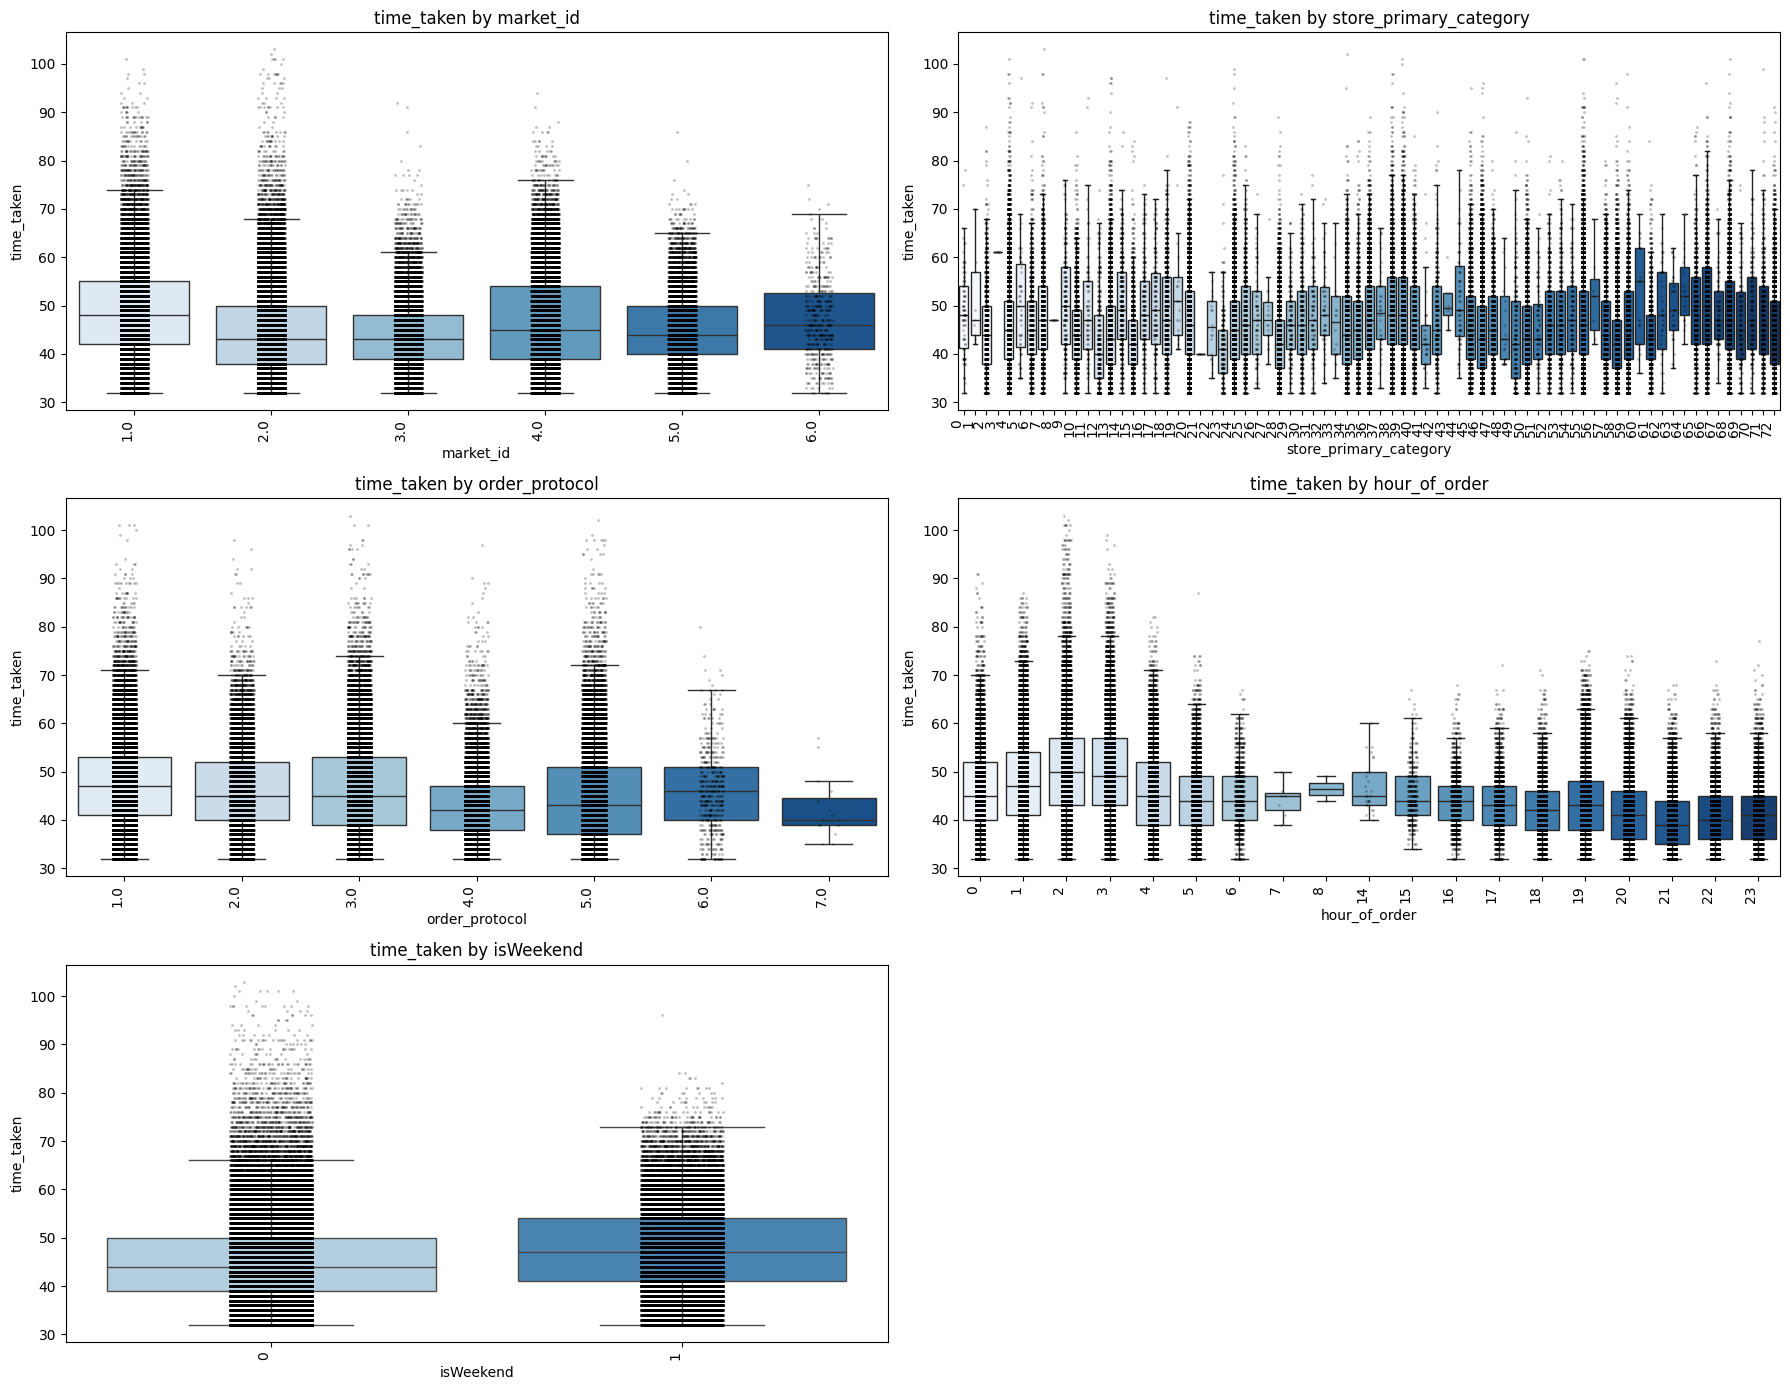

In [ ]:
# for categorical variables
plt.figure(figsize=(18, 14))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=X_train[col], y=y_train, showfliers=False, palette='Blues')

    # jittered points for extra insight
    sns.stripplot(x=X_train[col], y=y_train, alpha=0.25, color='black', size=2)

    plt.title(f'time_taken by {col}')
    plt.xlabel(col)
    plt.ylabel('time_taken')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# Show the distribution of time_taken for different hours

sns.boxplot(x=X_train['hour_of_order'], y=y_train, palette='Reds')
plt.title(f'distribution of time_taken by hour')
plt.xlabel('hour_of_order')
plt.ylabel('time_taken')
plt.tight_layout()
plt.show()



/tmp/ipython-input-27-3528491505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['hour_of_order'], y=y_train, palette='Reds')


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [ ]:
# Plot the heatmap of the correlation matrix

corr_matrix = X_train.copy()
corr_matrix['time_taken'] = y_train


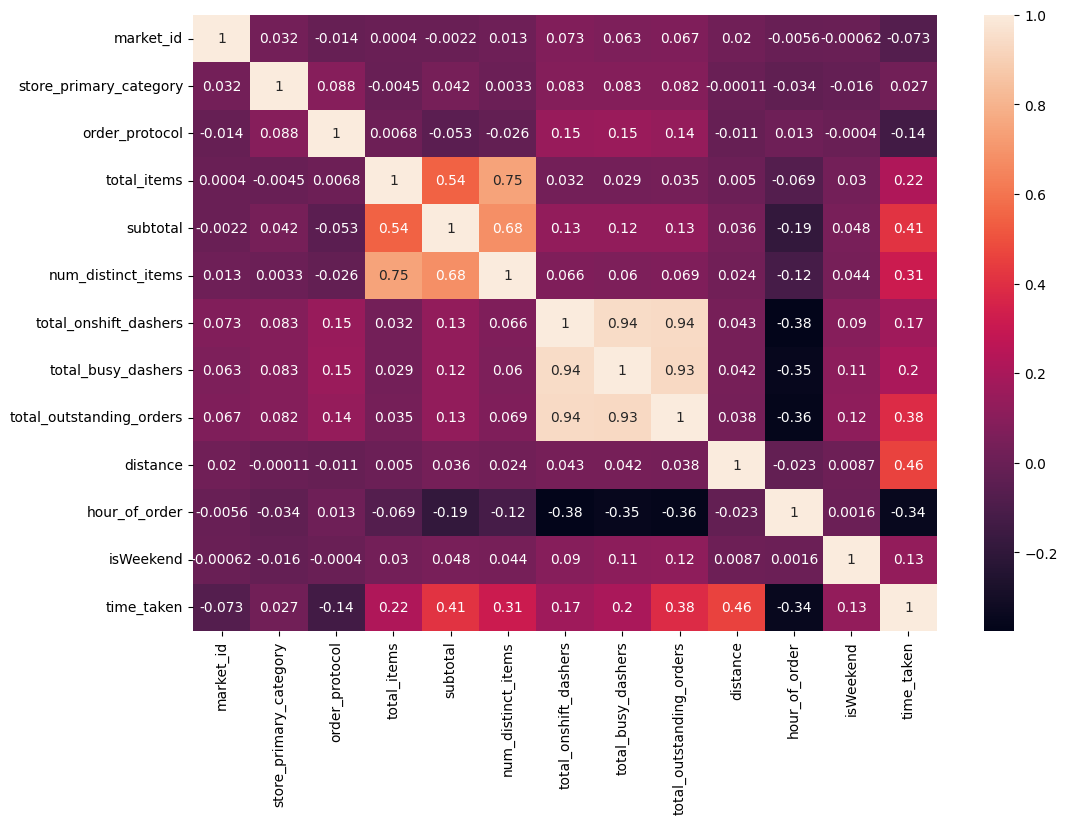

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix.corr(),annot = True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset

weak_col = ['market_id', 'store_primary_category','order_protocol']
X_train = X_train.drop(columns = weak_col)
# X_test = X_test.drop(columns = weak_col)



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [ ]:
# Boxplot for time_taken

train_box = X_train[num_var].copy()
train_box['time_taken'] = y_train



In [ ]:
train_box.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111             1      1350                   1                   23.0   
58452             5      4285                   5                  112.0   
20644             6      7880                   3                   80.0   
79735             3      3660                   3                  127.0   
167933            5      8575                   5                   44.0   

        total_busy_dashers  total_outstanding_orders  distance  time_taken  
42111                 20.0                      19.0      9.60        32.0  
58452                100.0                     207.0     34.56        71.0  
20644                 79.0                     115.0     34.92        62.0  
79735                106.0                     173.0     25.76        54.0  
167933                44.0                      61.0     17.72        56.0

/tmp/ipython-input-33-1764926800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_box[col], palette='Reds')
/tmp/ipython-input-33-1764926800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_box[col], palette='Reds')
/tmp/ipython-input-33-1764926800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_box[col], palette='Reds')
/tmp/ipython-input-33-1764926800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

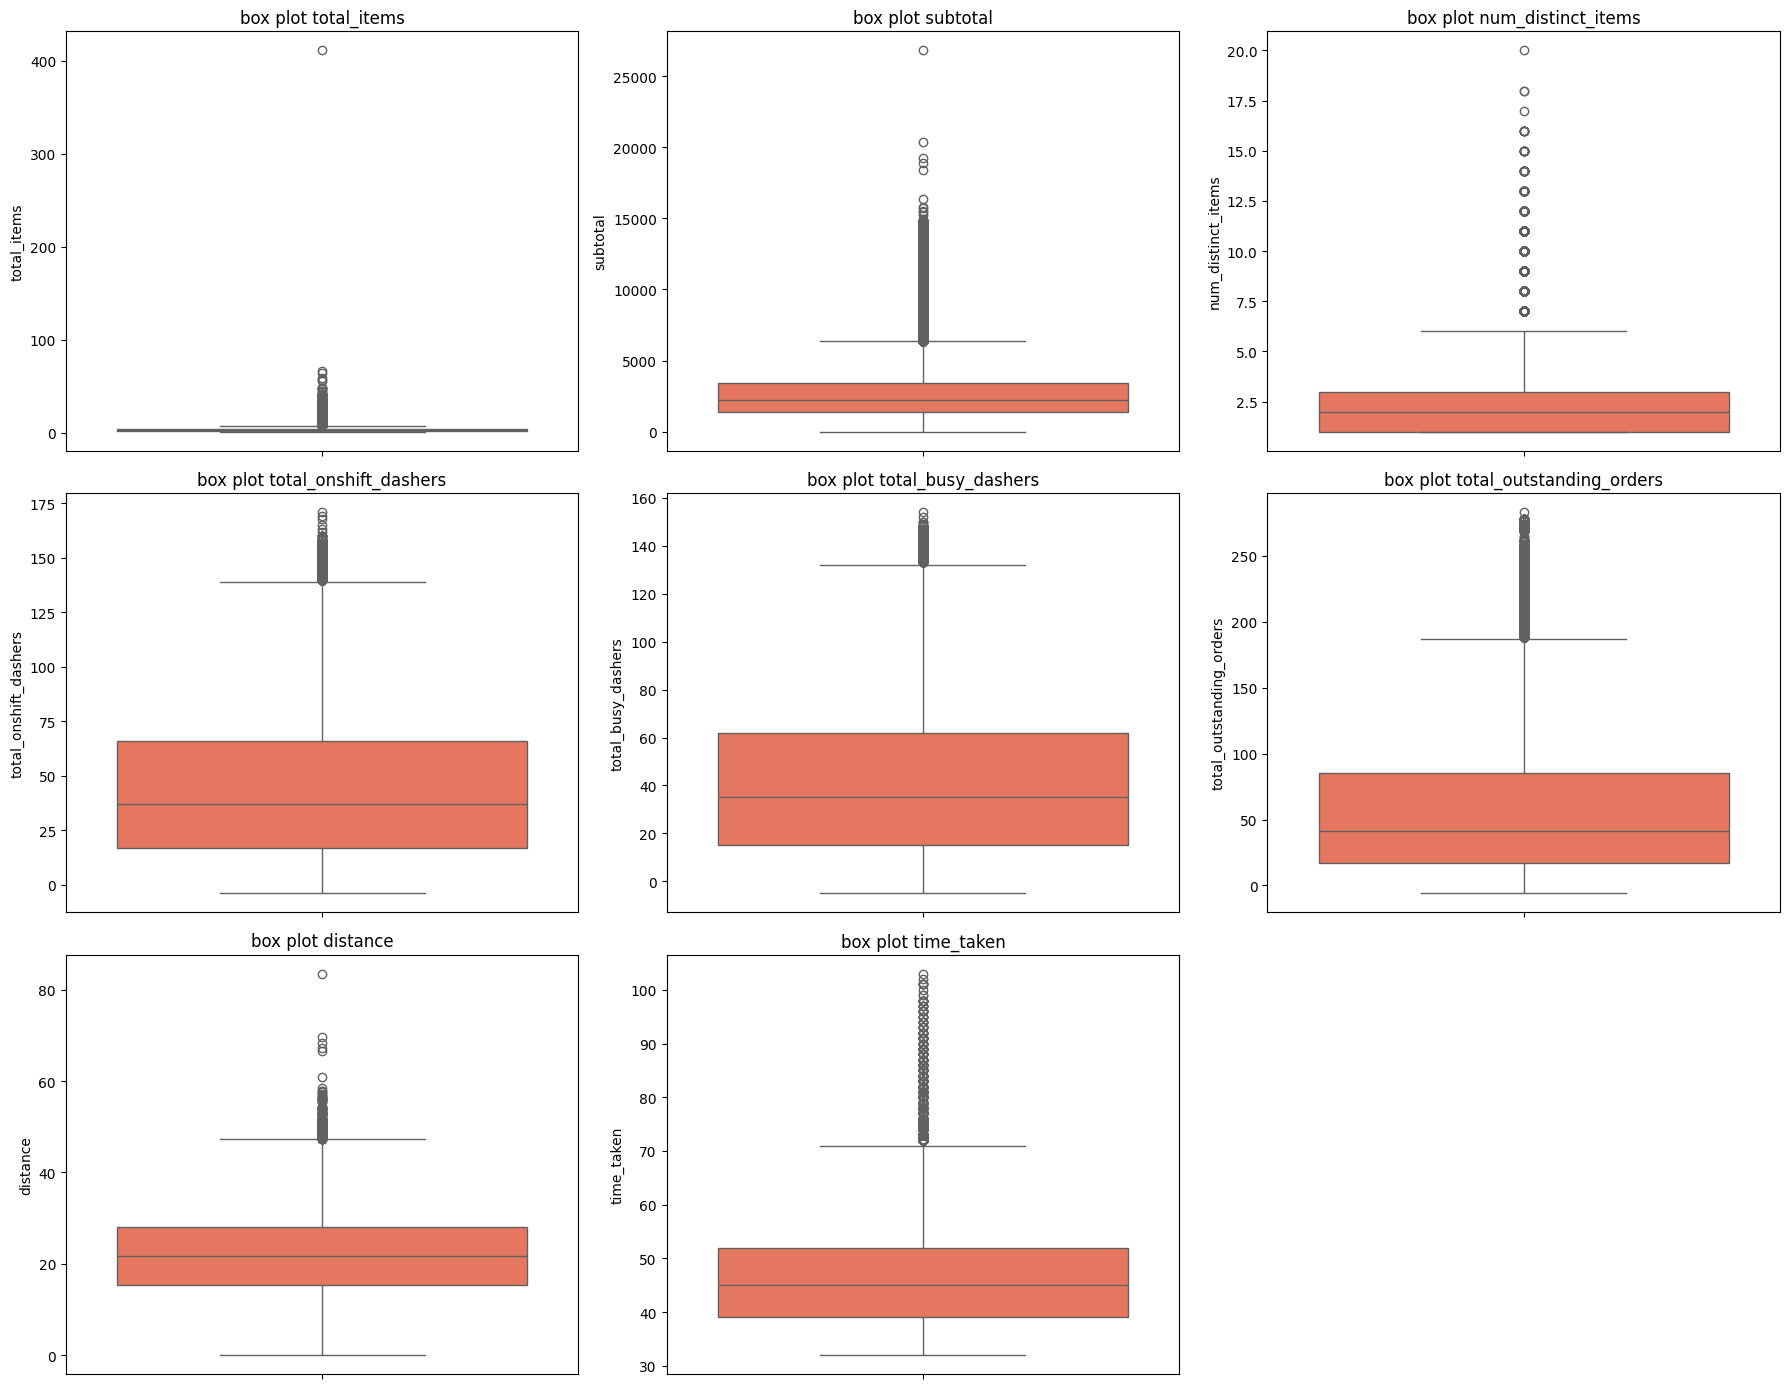

In [ ]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(train_box.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(train_box[col], palette='Reds')
    plt.title(f'box plot {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers
col_outlier = (['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers',
               'total_outstanding_orders','distance'])

upper_cap = {col: X_train[col].quantile(.99) for col in col_outlier}
upper_cap


{'total_items': np.float64(12.0),
 'subtotal': np.float64(9489.199999999953),
 'num_distinct_items': np.float64(8.0),
 'total_onshift_dashers': np.float64(136.0),
 'total_busy_dashers': np.float64(126.0),
 'total_outstanding_orders': np.float64(213.0),
 'distance': np.float64(41.84)}

In [ ]:
for col, upper in upper_cap.items():
    X_train[col] = X_train[col].clip(upper=upper)
X_train.describe()

total_items       subtotal  num_distinct_items  \
count  140621.000000  140621.000000       140621.000000   
mean        3.149295    2679.578914            2.656943   
std         2.151987    1748.937004            1.552343   
min         1.000000       0.000000            1.000000   
25%         2.000000    1415.000000            1.000000   
50%         3.000000    2220.000000            2.000000   
75%         4.000000    3407.000000            3.000000   
max        12.000000    9489.200000            8.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.866058           41.792172                 58.016726   
std                34.327508           31.969860                 51.966568   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           62.000000                 85.000000   
max               136.000000          126.000000                213.000000   

            distance  hour_of_order  
count  140621.000000  140621.000000  
mean       21.802641       8.473365  
std         8.668611       8.676889  
min         0.000000       0.000000  
25%        15.320000       2.000000  
50%        21.760000       3.000000  
75%        28.120000      19.000000  
max        41.840000      23.000000

/tmp/ipython-input-36-2363545202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(X_train[col], palette='Reds')
/tmp/ipython-input-36-2363545202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(X_train[col], palette='Reds')
/tmp/ipython-input-36-2363545202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(X_train[col], palette='Reds')
/tmp/ipython-input-36-2363545202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

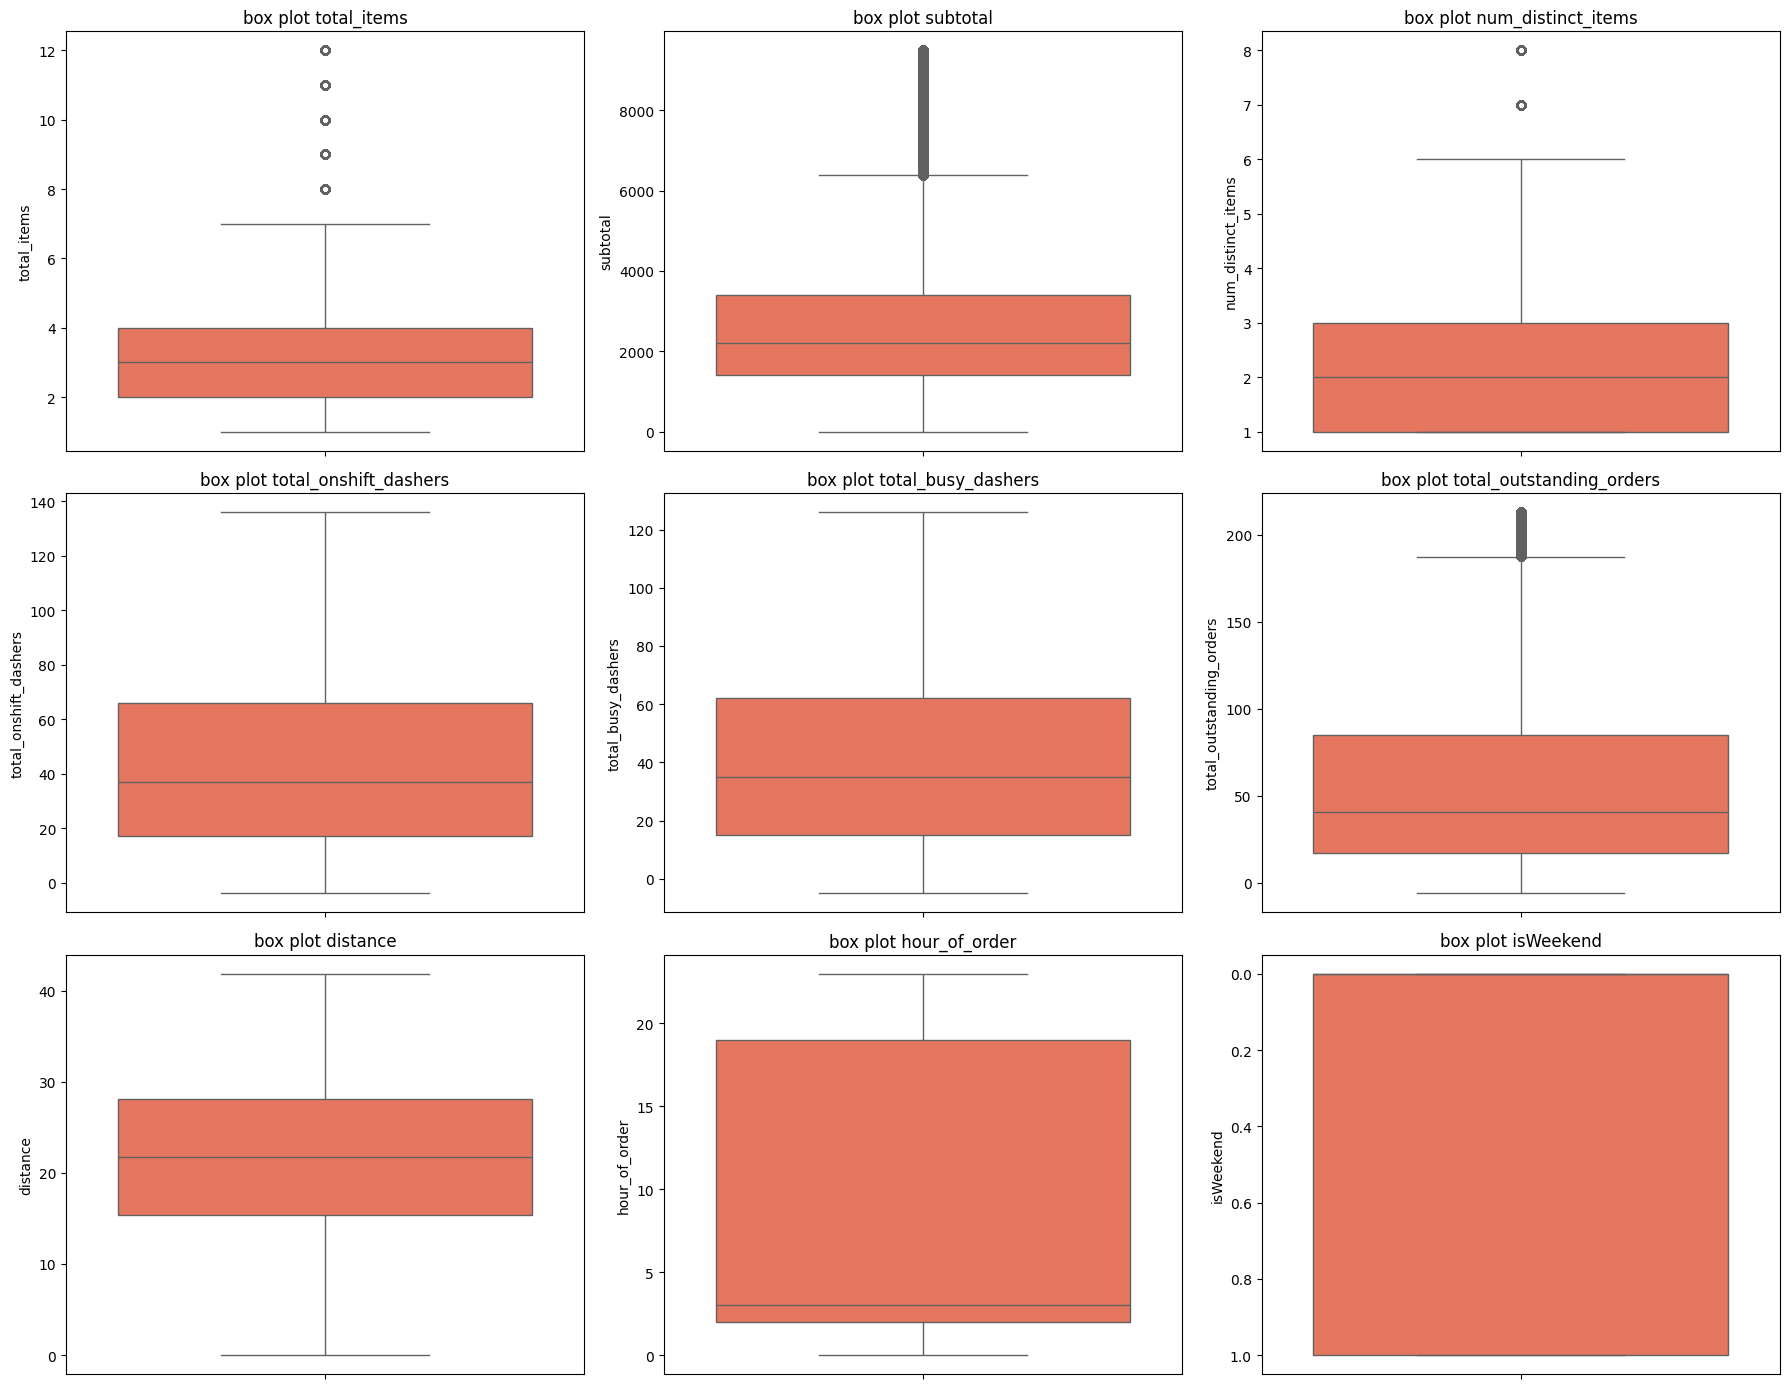

In [ ]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(X_train[col], palette='Reds')
    plt.title(f'box plot {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

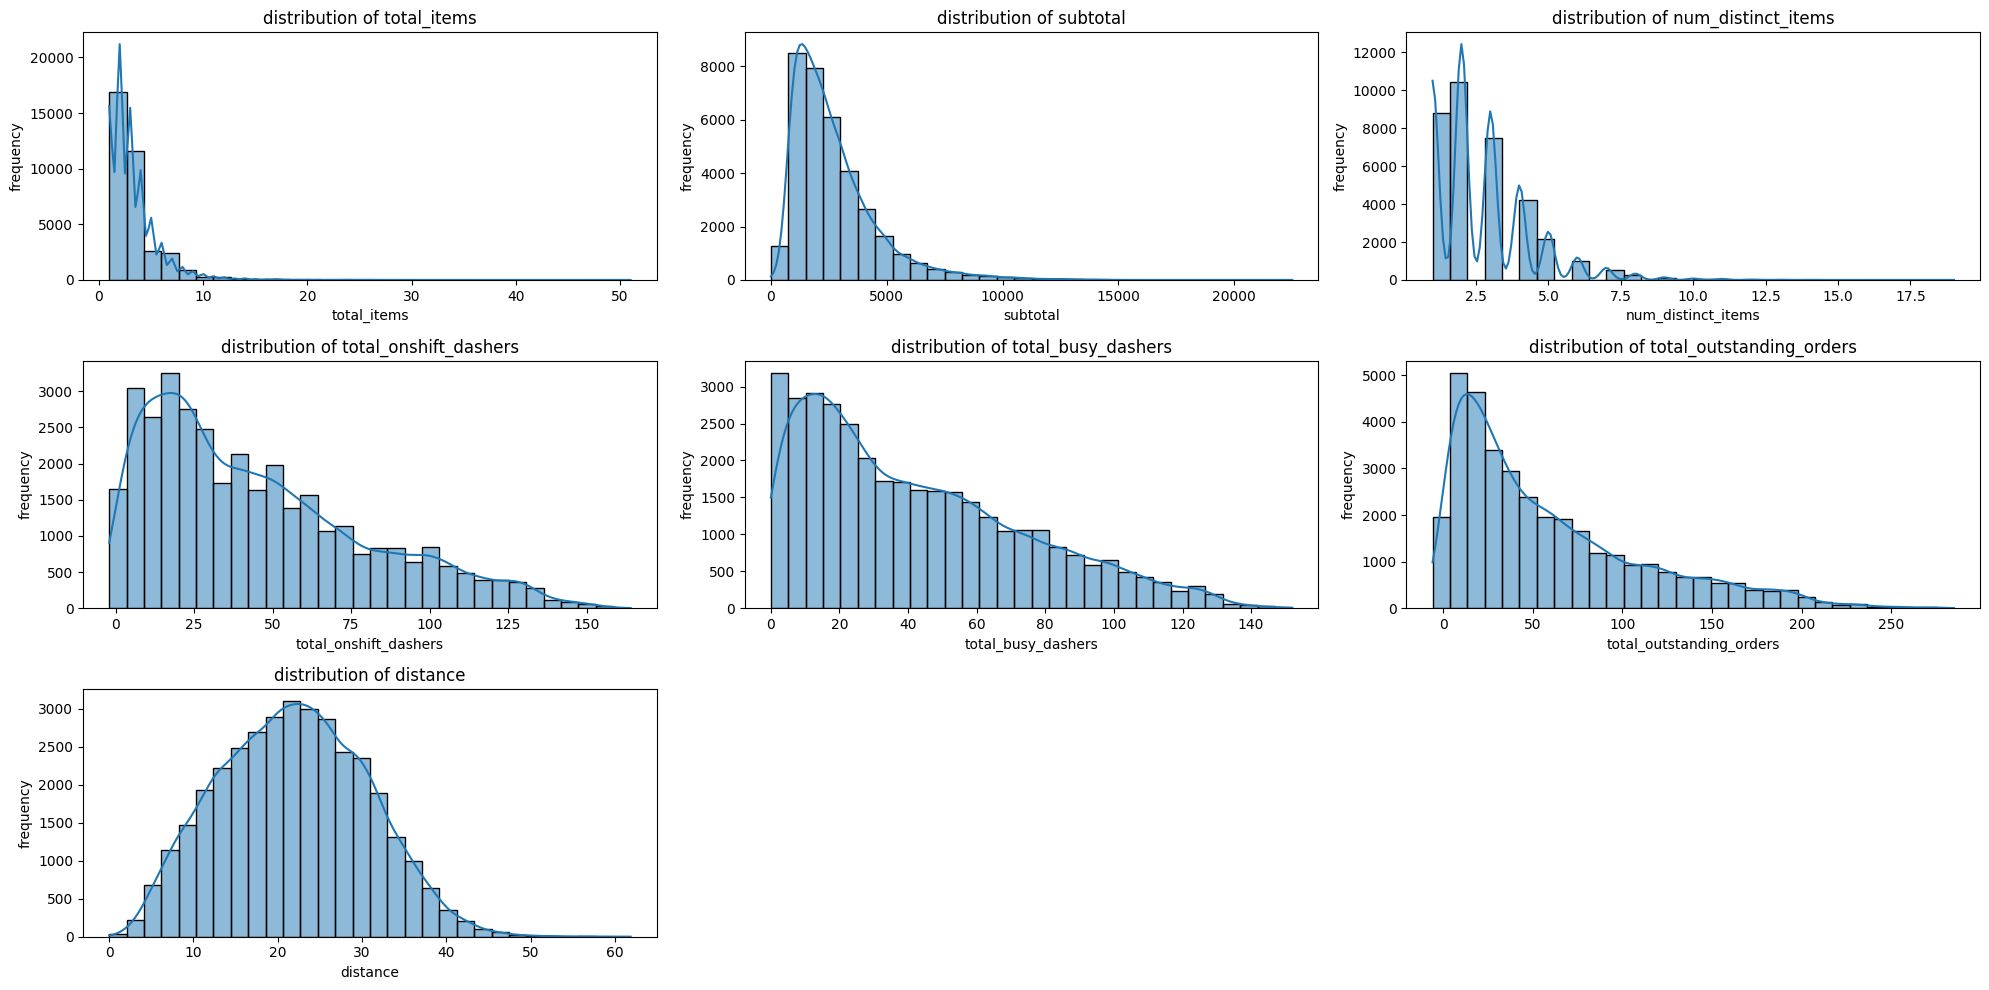

In [ ]:
# Plot distributions for all numerical columns

# Plot distributions for all numerical columns

plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    sns.histplot(X_test[col], kde = True, bins = 30)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()



##### **4.1.2**
Check the distribution of categorical features

/tmp/ipython-input-38-799220516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_test, x=col, palette='Blues')
/tmp/ipython-input-38-799220516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_test, x=col, palette='Blues')
/tmp/ipython-input-38-799220516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_test, x=col, palette='Blues')
/tmp/ipython-input-38-799220516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

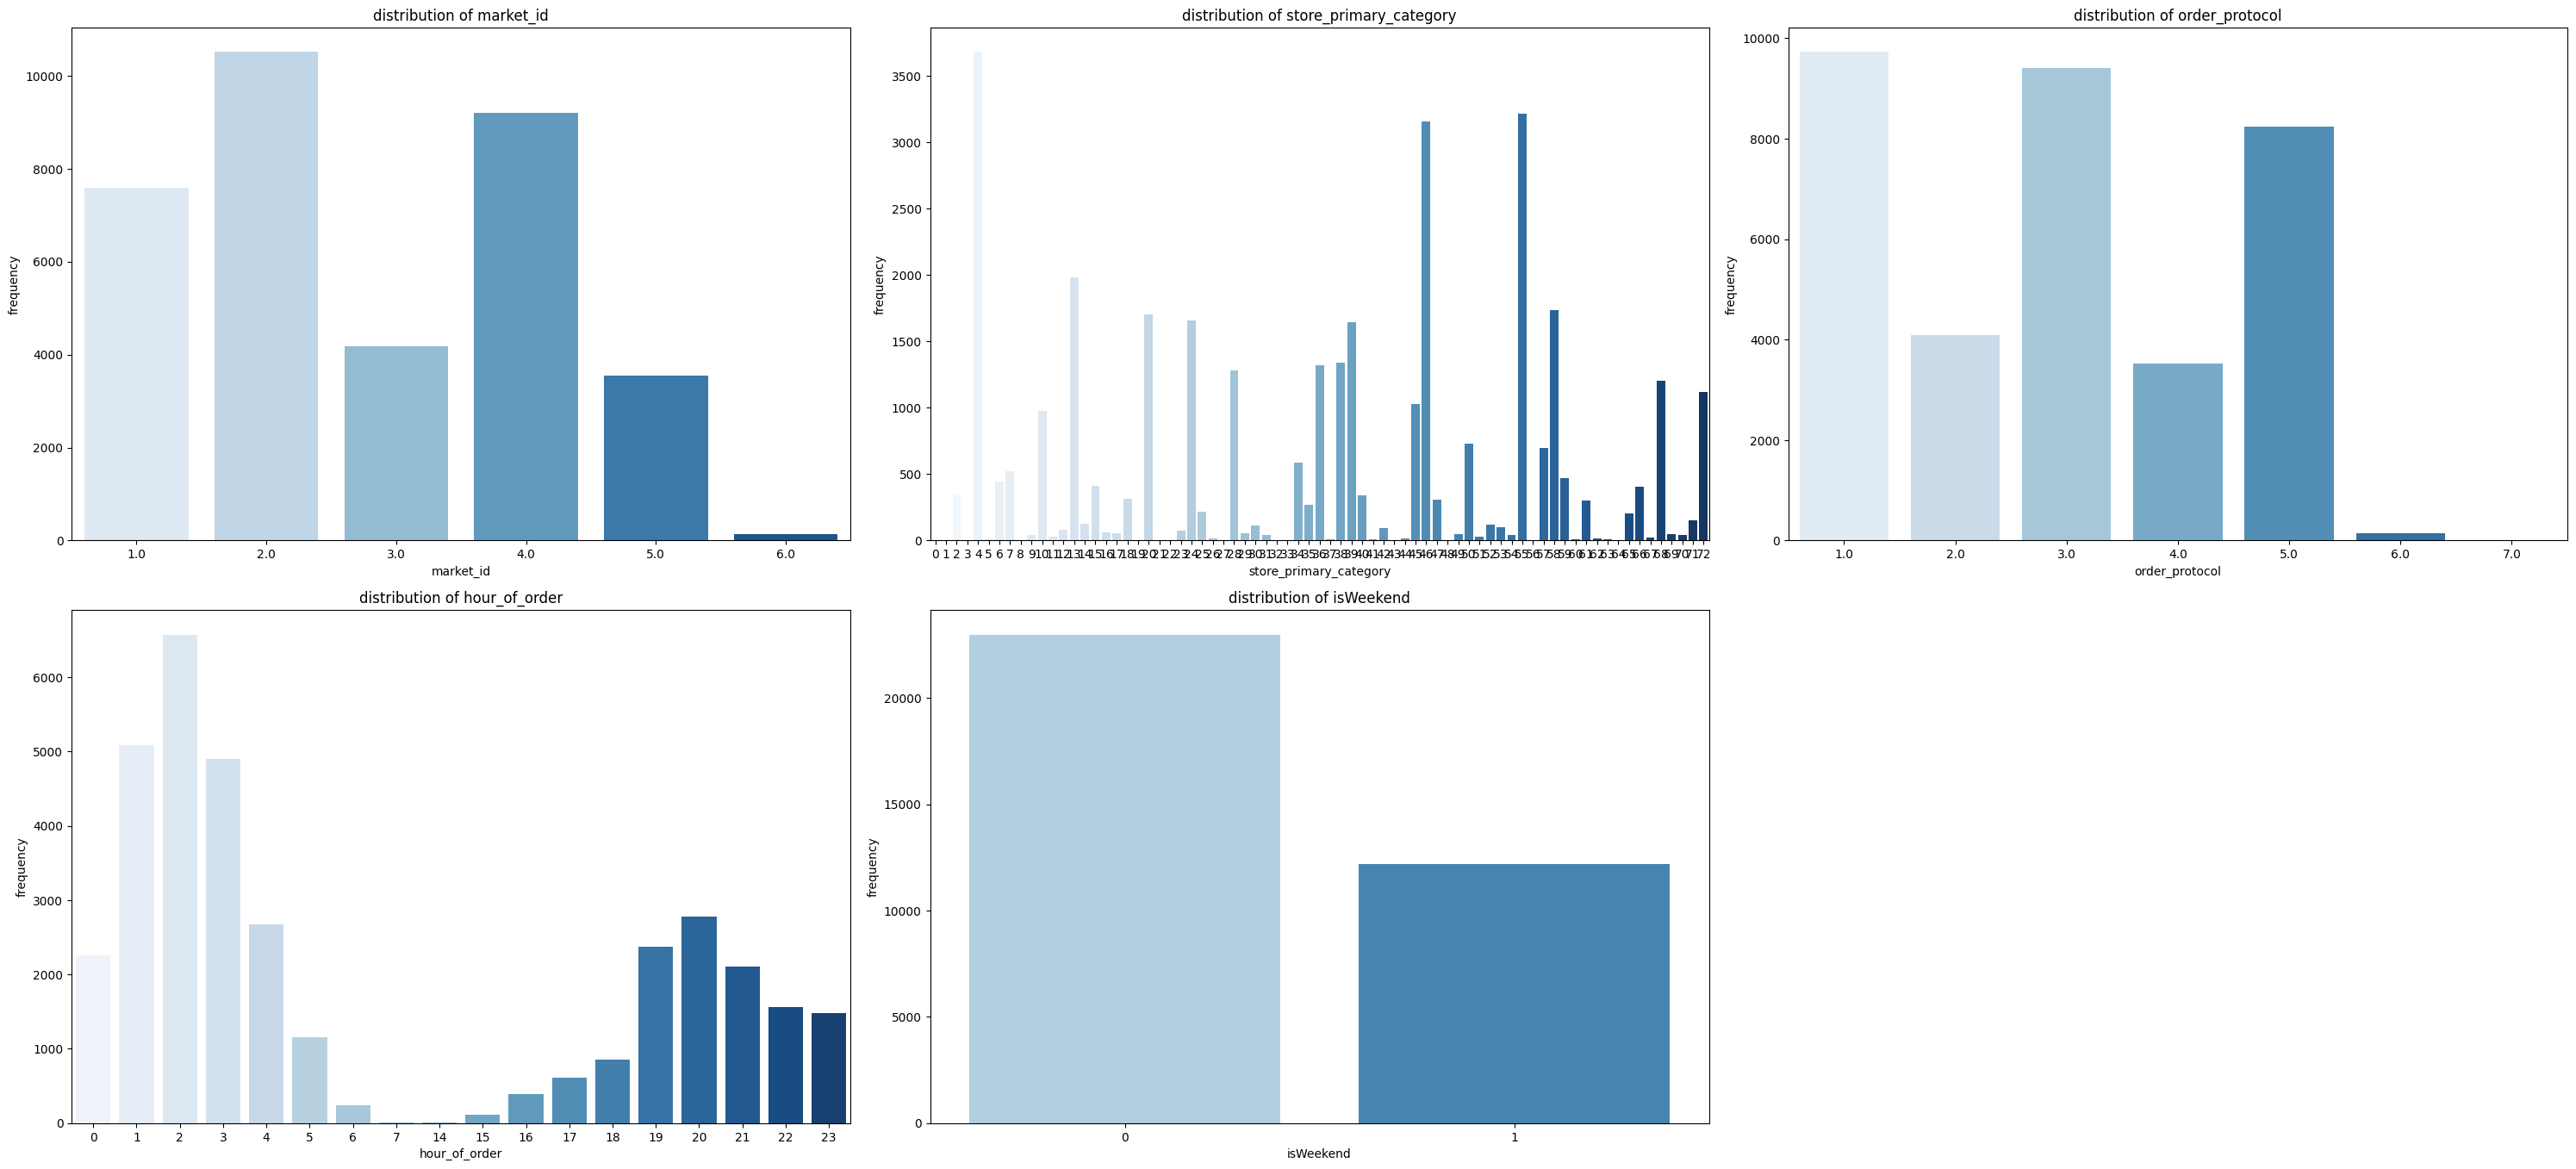

In [ ]:
# Distribution of categorical columns
plt.figure(figsize = (30,20))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_test, x=col, palette='Blues')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

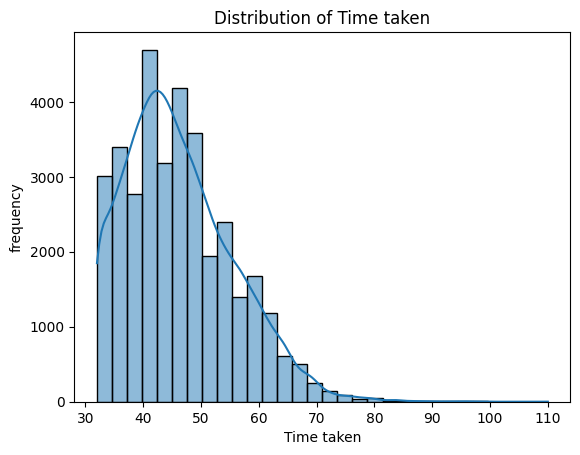

In [ ]:
# Distribution of time_taken

sns.histplot(y_test, kde = True, bins = 30)
plt.title('Distribution of Time taken')
plt.xlabel('Time taken')
plt.ylabel('frequency')
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

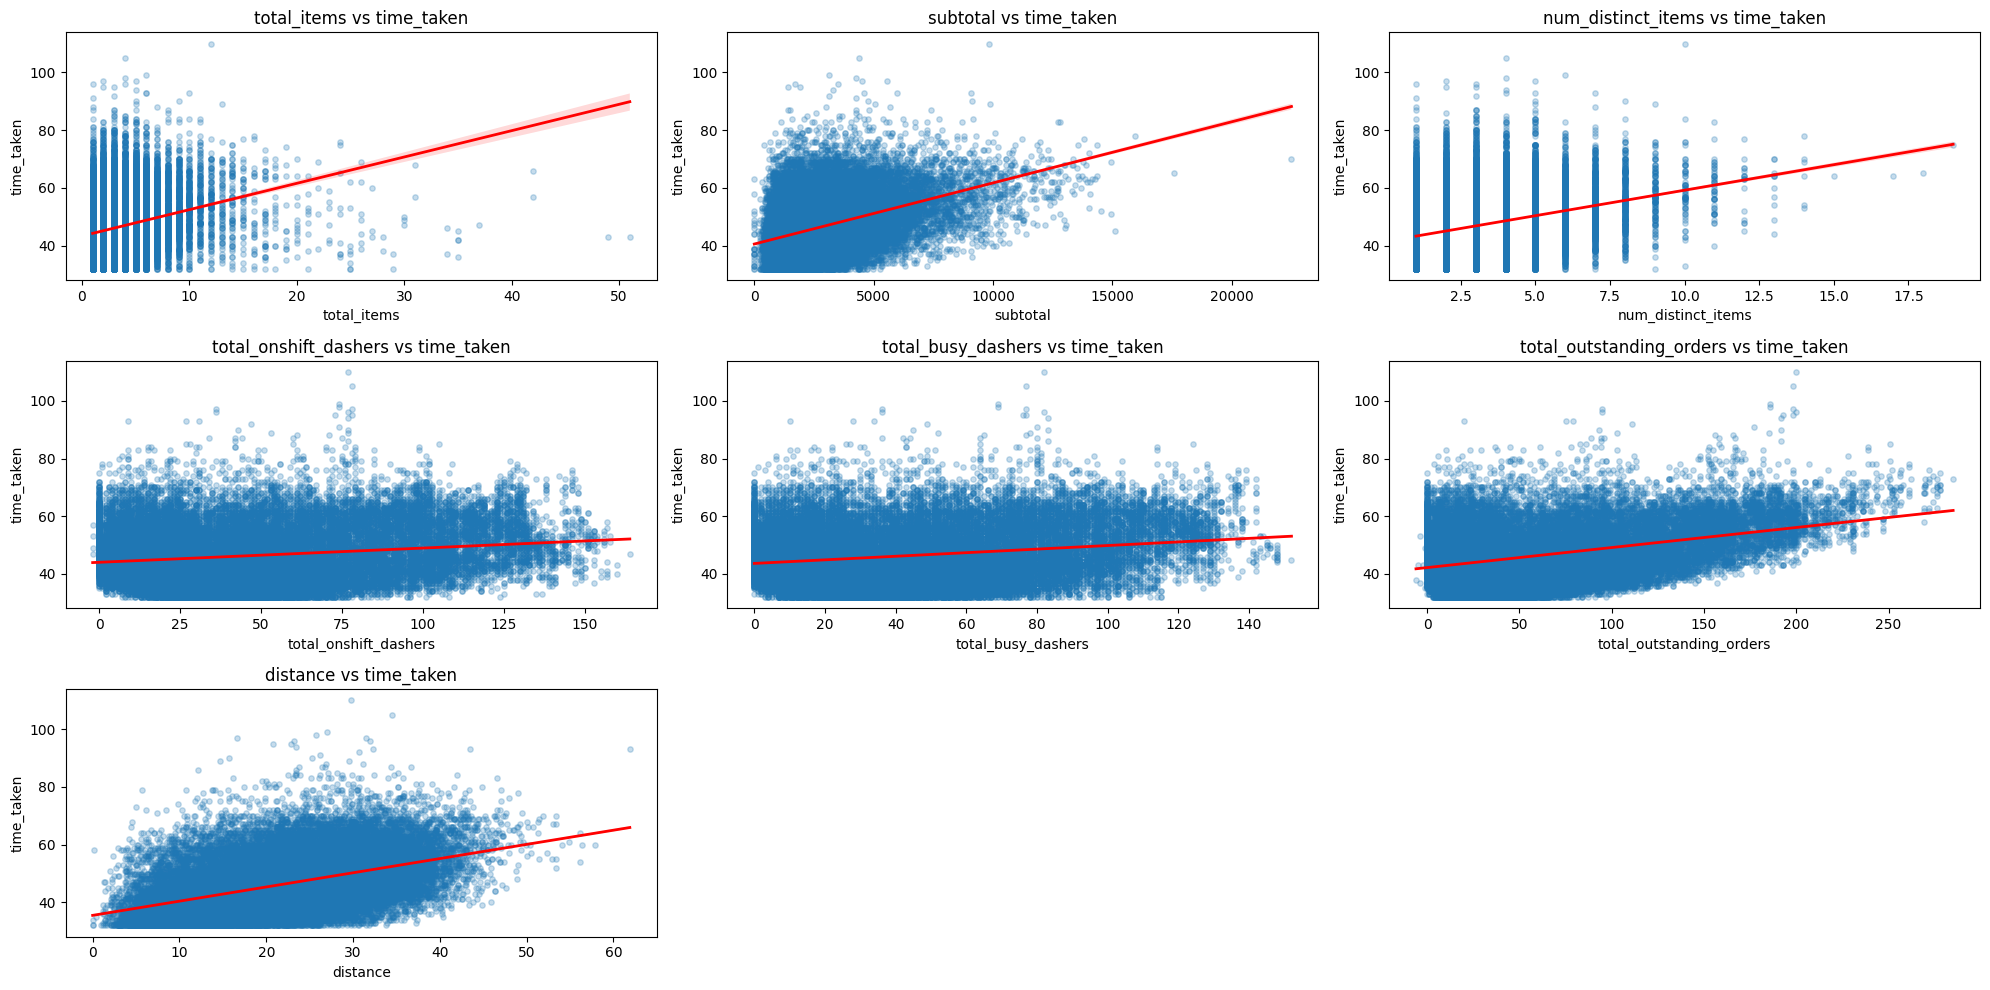

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    # sns.scatterplot(x = X_test[col],y = y_test)
    sns.regplot(x = X_test[col], y = y_test, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset

X_test = X_test.drop(columns = weak_col)

# using cap from training data only as test data should remain unseen- so no data leakage

for col, upper in upper_cap.items():
    X_test[col] = X_test[col].clip(upper=upper)
X_test.describe()



total_items      subtotal  num_distinct_items  total_onshift_dashers  \
count  35156.000000  35156.000000        35156.000000           35156.000000   
mean       3.155166   2681.405114            2.664922              44.730089   
std        2.157123   1749.042267            1.560160              34.283463   
min        1.000000      0.000000            1.000000              -2.000000   
25%        2.000000   1404.000000            1.000000              17.000000   
50%        3.000000   2238.000000            2.000000              37.000000   
75%        4.000000   3415.000000            3.000000              65.000000   
max       12.000000   9489.200000            8.000000             136.000000   

       total_busy_dashers  total_outstanding_orders      distance  \
count        35156.000000              35156.000000  35156.000000   
mean            41.829446                 58.016868     21.850121   
std             32.097912                 52.274561      8.654638   
min              0.000000                 -6.000000      0.000000   
25%             15.000000                 17.000000     15.360000   
50%             34.000000                 41.000000     21.840000   
75%             63.000000                 85.000000     28.160000   
max            126.000000                213.000000     41.840000   

       hour_of_order  
count   35156.000000  
mean        8.473746  
std         8.676612  
min         0.000000  
25%         2.000000  
50%         3.000000  
75%        19.000000  
max        23.000000

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
scaler = MinMaxScaler()

In [ ]:
angle_train = 2 * np.pi * X_train['hour_of_order'] / 24
X_train['hour_sin'] = np.sin(angle_train)
X_train['hour_cos'] = np.cos(angle_train)


X_train.drop(columns=['hour_of_order'], inplace=True)
X_train.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111             1    1350.0                   1                   23.0   
58452             5    4285.0                   5                  112.0   
20644             6    7880.0                   3                   80.0   
79735             3    3660.0                   3                  127.0   
167933            5    8575.0                   5                   44.0   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
42111                 20.0                      19.0      9.60         0   
58452                100.0                     207.0     34.56         1   
20644                 79.0                     115.0     34.92         0   
79735                106.0                     173.0     25.76         1   
167933                44.0                      61.0     17.72         0   

        hour_sin  hour_cos  
42111  -0.866025  0.500000  
58452   0.500000  0.866025  
20644   0.707107  0.707107  
79735   0.500000  0.866025  
167933  0.500000  0.866025

In [ ]:
num_var.extend(['hour_sin','hour_cos'])

In [ ]:
# Apply scaling to the numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()




total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111      0.000000  0.142267            0.000000               0.192857   
58452      0.363636  0.451566            0.571429               0.828571   
20644      0.454545  0.830418            0.285714               0.600000   
79735      0.181818  0.385702            0.285714               0.935714   
167933     0.363636  0.903659            0.571429               0.342857   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
42111             0.190840                  0.114155  0.229446         0   
58452             0.801527                  0.972603  0.826004         1   
20644             0.641221                  0.552511  0.834608         0   
79735             0.847328                  0.817352  0.615679         1   
167933            0.374046                  0.305936  0.423518         0   

        hour_sin  hour_cos  
42111   0.066987  0.732051  
58452   0.750000  0.928203  
20644   0.853553  0.843039  
79735   0.750000  0.928203  
167933  0.750000  0.928203

In [ ]:
X_train.describe()

total_items       subtotal  num_distinct_items  \
count  140621.000000  140621.000000       140621.000000   
mean        0.195390       0.282382            0.236706   
std         0.195635       0.184308            0.221763   
min         0.000000       0.000000            0.000000   
25%         0.090909       0.149117            0.000000   
50%         0.181818       0.233950            0.142857   
75%         0.272727       0.359040            0.285714   
max         1.000000       1.000000            1.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean                0.349043            0.357192                  0.292314   
std                 0.245196            0.244045                  0.237290   
min                 0.000000            0.000000                  0.000000   
25%                 0.150000            0.152672                  0.105023   
50%                 0.292857            0.305344                  0.214612   
75%                 0.500000            0.511450                  0.415525   
max                 1.000000            1.000000                  1.000000   

            distance       hour_sin       hour_cos  
count  140621.000000  140621.000000  140621.000000  
mean        0.521096       0.534290       0.826150  
std         0.207185       0.329134       0.174115  
min         0.000000       0.000000       0.000000  
25%         0.366157       0.146447       0.732051  
50%         0.520076       0.629410       0.843039  
75%         0.672084       0.853553       0.981740  
max         1.000000       1.000000       1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# preparing test data set
angle_test = 2 * np.pi * X_test['hour_of_order'] / 24
X_test['hour_sin'] = np.sin(angle_test)
X_test['hour_cos'] = np.cos(angle_test)
X_test.drop(columns='hour_of_order', inplace=True)

In [ ]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
139667     0.181818  0.136471            0.142857               0.450000   
80077      0.090909  0.310880            0.000000               0.157143   
41872      0.000000  0.147009            0.000000               0.228571   
165269     0.090909  0.312671            0.142857               0.914286   
151215     0.181818  0.131729            0.142857               0.307143   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
139667            0.488550                  0.305936  0.491396         0   
80077             0.167939                  0.100457  0.306883         1   
41872             0.244275                  0.232877  0.401530         0   
165269            1.000000                  0.940639  0.454111         1   
151215            0.267176                  0.178082  0.638623         1   

        hour_sin  hour_cos  
139667  0.853553  0.843039  
80077   0.629410  0.981740  
41872   0.853553  0.843039  
165269  0.853553  0.843039  
151215  0.250000  0.928203

In [ ]:
# Create/Initialise the model
lr = LinearRegression()

In [ ]:
# Train the model using the training data
lr = lr.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
# Find results for evaluation metrics
print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE :", mean_absolute_error(y_test,  y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,  y_train_pred)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test  R²  :", r2_score(y_test,  y_test_pred))


Train MAE : 2.7004286369664423
Test  MAE : 2.6800140199276417
Train RMSE: 3.663253440801591
Test  RMSE: 3.641612281297512
Train R²  : 0.8456307709518165
Test  R²  : 0.8480501376837215


In [ ]:
# getting adjusted r sq for better evaluation

def adj_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train, p = X_train.shape
n_test      = X_test.shape[0]

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

print(f"Train Adj R²: {adj_r2(r2_train, n_train, p):.3f}")
print(f"Test  Adj R²: {adj_r2(r2_test,  n_test,  p):.3f}")

Train Adj R²: 0.846
Test  Adj R²: 0.848


In [ ]:
# Trying to see imp values using statsmodels

X_train_sm = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_sm).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 7.703e+04
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        06:06:56   Log-Likelihood:            -3.8211e+05
No. Observations:              140621   AIC:                         7.642e+05
Df Residuals:                  140610   BIC:                         7.643e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

In [ ]:
# Loop through the number of features and test the model

results = []

# Total number of features
n_total = X_train.shape[1]

# selecting 7 features
for k in range(n_total, 6, -1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=k)
    rfe.fit(X_train, y_train)

    selected_features = X_train.columns[rfe.support_]

    # Train model
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test[selected_features])
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    results.append((k, list(selected_features), r2, rmse))

# Print results
for k, features, r2, rmse in results:
    print(f"{k} features | R² = {r2:.4f} | RMSE = {rmse:.2f} | Features: {features}")

10 features | R² = 0.8481 | RMSE = 13.26 | Features: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend', 'hour_sin', 'hour_cos']
9 features | R² = 0.8438 | RMSE = 13.63 | Features: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']
8 features | R² = 0.8434 | RMSE = 13.67 | Features: ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']
7 features | R² = 0.8416 | RMSE = 13.82 | Features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']


For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model



In [ ]:
# Build the final model with selected number of features
final_col = ['subtotal','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance','hour_sin','hour_cos']
X_train_final = X_train[final_col]
X_test_final = X_test[final_col]

fm = LinearRegression()

fm = fm.fit(X_train_final, y_train)

y_train_pred = fm.predict(X_train_final)
y_test_pred = fm.predict(X_test_final)

# results for evaluation metrics

print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE :", mean_absolute_error(y_test,  y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test  R²  :", r2_score(y_test,  y_test_pred))



Train MAE : 2.7876459386506656
Test  MAE : 2.7717412421547154
Train RMSE: 3.7336011997359
Test  RMSE: 3.7176200725582276
Train R²  : 0.8396449440503757
Test  R²  : 0.8416409420465836


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

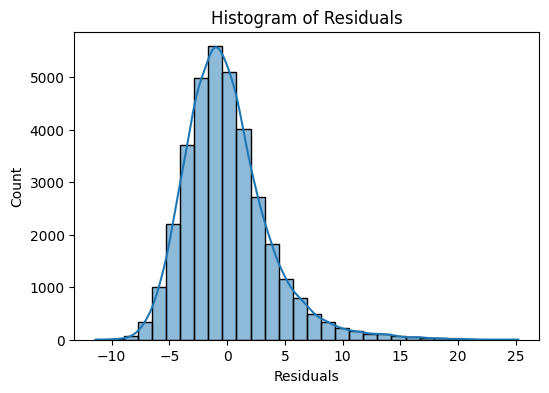

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


residuals = y_test - y_test_pred

# residuals histogram

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

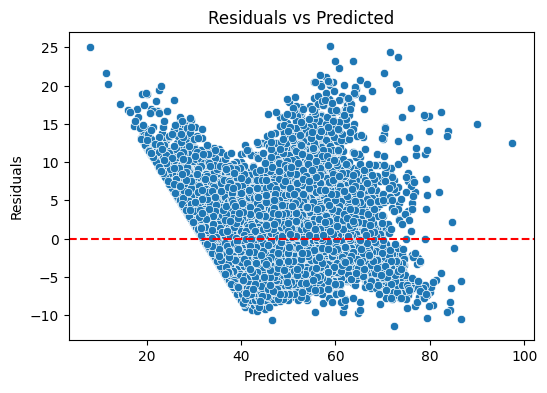

In [ ]:
# residuals vs predicted value

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


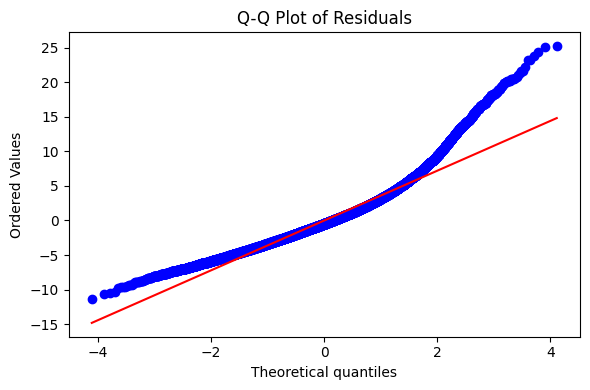

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


[Your inferences here:

I made a linear regression model using 7 features to predict how long deliveries take. It turns out the model was actually pretty decent—it could explain around 84% of the differences in delivery times, and on average it was off by just 2.8 minutes. The accuracy stayed about the same on both the training and test sets, so it looks like it’s not just memorizing stuff—it’s actually learning patterns that generalize.
One thing I noticed while checking the features was that a couple of them were kind of overlapping—like the number of dashers working and how many were already busy. They were super related, which is called multicollinearity. It doesn’t really mess with the predictions, but it does make it harder to say how important each one is on its own.
All in all, I think the model works well enough and could actually help in real-world delivery scenarios.]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model
# scaled coefficients
coef = pd.Series(ols.params).drop('const')

scaled_features = ['total_items', 'subtotal', 'total_onshift_dashers', 'total_outstanding_orders', 'distance']

# range for scaled features
range_diff = X[scaled_features].agg(['min', 'max']).T
range_diff['range'] = range_diff['max'] - range_diff['min']

# unscaled impact
unscaled_impact = coef[scaled_features] * range_diff['range']

final_df = pd.DataFrame({'Feature': coef.index, 'Scaled Coef': coef.values})

# range and unscaled impact
final_df['Range'] = final_df['Feature'].map(range_diff['range'].round(2))
final_df['Unscaled Impact'] = final_df['Feature'].map(unscaled_impact.round(2))

final_df


Feature  Scaled Coef     Range  Unscaled Impact
0               total_items    -2.049131    410.00          -840.14
1                  subtotal    15.708633  26800.00        420991.38
2        num_distinct_items     3.851138       NaN              NaN
3     total_onshift_dashers   -52.403171    175.00         -9170.55
4        total_busy_dashers   -20.210625       NaN              NaN
5  total_outstanding_orders    79.442492    291.00         23117.77
6                  distance    20.115422     83.52          1680.04
7                 isWeekend     1.199864       NaN              NaN
8                  hour_sin     4.805411       NaN              NaN
9                  hour_cos     3.177907       NaN              NaN

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

fdf = final_df[~final_df['Range'].isna()]

# unit change impact
fdf['Unit_change_impact'] = (fdf['Scaled Coef'] / fdf['Range']).round(4)

fdf[['Feature', 'Scaled Coef', 'Range', 'Unit_change_impact']]




/tmp/ipython-input-64-3255673356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Unit_change_impact'] = (fdf['Scaled Coef'] / fdf['Range']).round(4)


Feature  Scaled Coef     Range  Unit_change_impact
0               total_items    -2.049131    410.00             -0.0050
1                  subtotal    15.708633  26800.00              0.0006
3     total_onshift_dashers   -52.403171    175.00             -0.2994
5  total_outstanding_orders    79.442492    291.00              0.2730
6                  distance    20.115422     83.52              0.2408

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, there are there are 3 categorical variables in the final dataset
those are:
Order_protocol, hours_of_order, is_weekend


Higher the ordr_protocol reduces the delivery time due to negative coeffecient

hours_of order signifies if the order is in 2nd part of the day delivery time will reduce

is_weekend having positive coeffecient meaning it will take longer time of delivery in weekends






---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>Test size 0.2 means when we are testing the data we collected 20% of the data for the testing the model and remaining 80 % of the data to train the model



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the heatmap, we can see that the feature distance has the highest correlation with the target variable (delivery time), with a correlation coefficient of 0.46. This positive correlation suggests that as the distance increases, the delivery time tends to increase as well.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>In this assignment we used box plots to detect the outliers, which is out side the inter quartile range
And to address the outliers applied capping at the 99 percentile.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

otal_outstanding_orders has the largest coefficient 71.09, meaning that increasing the number of outstanding orders has a strong impact on delivery time.

>distance is the next most influential feature with a coefficient of 19.99, indicating that delivery time increases with greater distances.

>subtotal is also important with a coefficient of 15.20, meaning higher order amounts result in longer delivery times.

---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is basically a way to make predictions using past data. It's part of supervised learning, where we try to figure out how one thing (like delivery time or price) depends on other things (like distance or number of items).
- The idea is to find a line (or a plane if we’ve got multiple factors) that fits the data well, so we can use it to make future predictions.


1. Simple Linear Regression:
- We use this when there's only one thing affecting the result.
- For example, if we’re trying to guess a house’s price just based on its size.
- It assumes a straight-line relationship, something like:
y = b0 + b1 * x1
(where y is the predicted value, x1 is the input feature, and b0, b1 are the coefficients we learn)
2. Multiple Linear Regression:
- This one kicks in when there are multiple factors influencing the result.
- Like, instead of just house size, we also consider number of bedrooms, location, etc.
- We still assume a linear relationship, just with more inputs plugged into the equation.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The main difference between simple and multiple linear regression is how many input features (or predictors) you’re using.



Simple Linear Regression
- This is when you're trying to predict something using just one variable.
- The idea is that the relationship between the input and the output can be shown with a straight line.
Example: Trying to guess house prices based only on house size.



Multiple Linear Regression
- This one steps it up by using more than one variable to make a prediction.
- Instead of a simple line, it’s like fitting a surface (or a hyperplane, if you want to sound fancy) through the data in multiple dimensions.
Example: Predicting house prices based on size, location, and number of rooms all at once.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function (also called the loss function) is what we use to figure out how far off our predictions are from the actual results in linear regression. Basically, it measures the error between what our model predicts and what really happened.
The most common one we use is Mean Squared Error (MSE) or Residual Sum of Squares (RSS), where we square the difference between predicted and actual values and then add them up. This helps us know how well (or badly) our model is doing.
To make the model better, we try to reduce this error. That’s where optimization comes in.
- Gradient Descent is one popular method—it keeps adjusting the model’s weights step by step to make the error smaller each time.
- Another way is Ordinary Least Squares (OLS), which finds the best coefficients all at once by solving a math equation, instead of through trial and error.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Overfitting is when your model becomes a little too good at learning the training data—even the random noise and little quirks that don’t matter. It ends up just memorizing stuff instead of learning actual patterns. So, while it does great on training data, it kind of flops on new data because it hasn’t really learned to generalize.


Underfitting, on the other hand, is like the model didn’t even try. It’s too simple to pick up on what’s really going on in the data. So it performs poorly not just on test data, but on the training data too—which is a clear sign it missed the point altogether.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>In linear regression, we check if our model follows certain rules using residual plots.


If the spread of errors looks uneven (like a funnel), it means the variance isn’t consistent—this is called heteroscedasticity.


If the histogram or Q-Q plot doesn’t look normal, the residuals might be skewed.


And if the residuals form a curve in the scatter plot, it means the relationship might not be properly linear.
